In [1]:
from src.Evolution import breed_population,evolve_population
from src.KnapsackItem import Item
from src.KnapsackIndividual import Individual
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
items = list(set([(np.random.randint(1,10),np.random.randint(1,10)) for x in range(30)])) # item = (weight,value)
def total_value(items, max_weight):
    return  sum([x[1] for x in items]) if sum([x[0] for x in items]) <= max_weight else 0
cache = {}
def solve(items, max_weight):
    if not items:
        return ()
    if (items,max_weight) not in cache:
        head = items[0]
        tail = items[1:]
        include = (head,) + solve(tail, max_weight - head[0])
        dont_include = solve(tail, max_weight)
        if total_value(include, max_weight) > total_value(dont_include, max_weight):
            answer = include
        else:
            answer = dont_include
        cache[(items,max_weight)] = answer
    return cache[(items,max_weight)]

In [15]:
max_weight = 100
solution = solve(tuple(items), max_weight)

In [16]:
np.sum([x[0] for x in list(solution)])

100

In [17]:
np.sum([x[1] for x in list(solution)])

124

In [18]:
items_ = [Item(x[0], x[1]) for x in items]
individuals = [Individual(items_, max_weight=100) for x in range(20)]

In [19]:
g,mev,w,v,f,mf,pop,bog,matings,pop_record = evolve_population(individuals,0.25,4,15,0.2)

Generation 0
65.0% Population Legal
Mean Fitness: 59771.03486801075
Best Value: 105
Most Fit:
   value: 105 weight: 98 fitness: 106209.04975252658
Generation 1
100.0% Population Legal
Mean Fitness: 100350.33693971745
Best Value: 109
Most Fit:
   value: 109 weight: 100 fitness: 117729.90909090909
Generation 2
100.0% Population Legal
Mean Fitness: 104999.89646486957
Best Value: 114
Most Fit:
   value: 114 weight: 99 fitness: 135302.37423680513
Generation 3
100.0% Population Legal
Mean Fitness: 112513.7375742466
Best Value: 115
Most Fit:
   value: 115 weight: 94 fitness: 142199.5183472701
Generation 4
100.0% Population Legal
Mean Fitness: 118767.94253304873
Best Value: 115
Most Fit:
   value: 115 weight: 94 fitness: 142199.5183472701
Generation 5
100.0% Population Legal
Mean Fitness: 119591.77636531336
Best Value: 115
Most Fit:
   value: 115 weight: 94 fitness: 142199.5183472701
Generation 6
100.0% Population Legal
Mean Fitness: 130929.05048400466
Best Value: 121
Most Fit:
   value: 121 w

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

AttributeError: 'list' object has no attribute 'items'

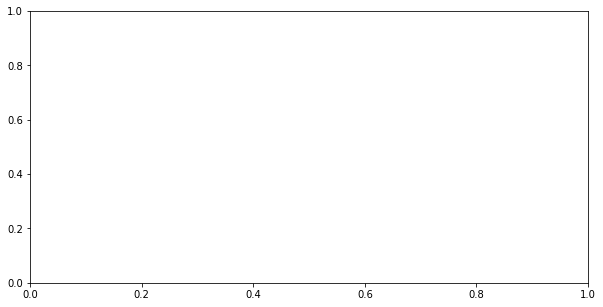

In [21]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)
draw_knapsack(items)

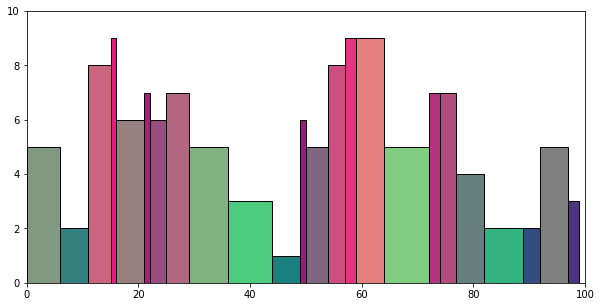

In [10]:
t = bog[2]

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)
def draw_knapsack(t,ax):
    xs = 0
    for s in t.items:
        ax.add_patch(patches.Rectangle((xs,0),s.weight,s.value,edgecolor="black",facecolor=(s.value/10,s.weight/10, 0.5)))
        xs+=s.weight
    plt.xlim(0,100)
    plt.ylim(0,10)
    
draw_knapsack(t,ax)

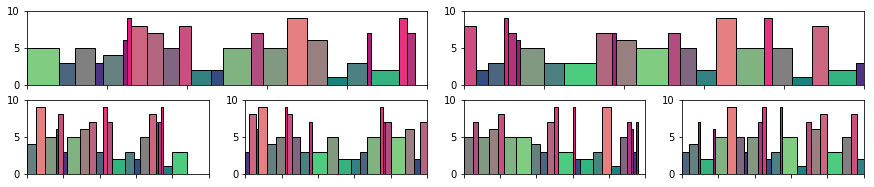

In [11]:
#Function to render matings into a family tree
#For a mating, show parents and offspring
#Row 1: Two parents
#Row 2: 4 Offspring
def drawMating(mating):
    plt.figure(figsize=(15,3))
    pax1 = plt.subplot2grid((2,4), (0,0), colspan=2)
    draw_knapsack(mating.parent_a,pax1)
    pax2 = plt.subplot2grid((2,4), (0,2), colspan=2)
    draw_knapsack(mating.parent_b,pax2)
    cax1 = plt.subplot2grid((2,4), (1,0))
    draw_knapsack(mating.children[0],cax1)
    cax2 = plt.subplot2grid((2,4), (1,1))
    draw_knapsack(mating.children[1],cax2)
    cax3 = plt.subplot2grid((2,4), (1,2))
    draw_knapsack(mating.children[2],cax3)
    cax4 = plt.subplot2grid((2,4), (1,3))
    draw_knapsack(mating.children[3],cax4)
    plt.setp(pax1.get_xticklabels(), visible=False)
    plt.setp(pax2.get_xticklabels(), visible=False)
    plt.setp(cax1.get_xticklabels(), visible=False)
    plt.setp(cax2.get_xticklabels(), visible=False)
    plt.setp(cax3.get_xticklabels(), visible=False)
    plt.setp(cax4.get_xticklabels(), visible=False)
    
drawMating(matings[0][0])


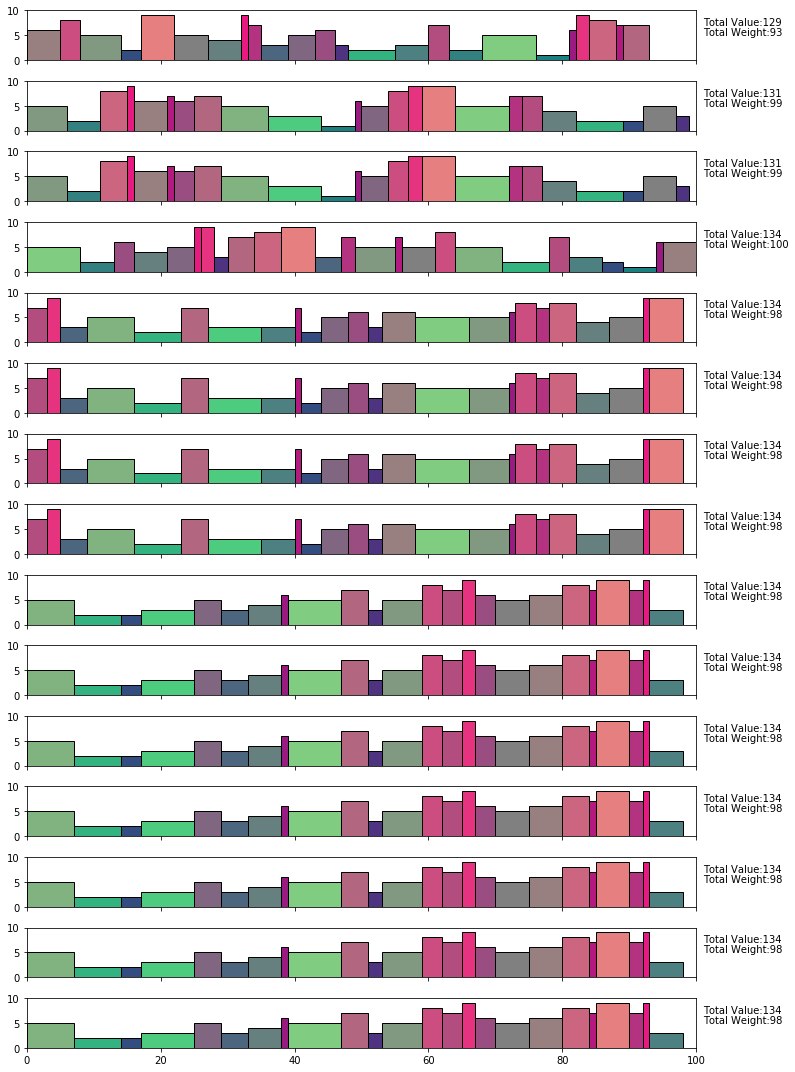

In [12]:
def draw_population(bog):
    f = plt.figure(figsize=(10,15))
    nbg = len(bog)
    for n,i in enumerate(bog):
    
        ax = f.add_subplot(nbg,1,n+1)
        draw_knapsack(i,ax)
        ax.text(101,7,"Total Value:{}".format(i.total_value()))
        ax.text(101,5,"Total Weight:{}".format(i.total_weight()))
        if n < nbg -1:
            plt.setp(ax.get_xticklabels(), visible=False)
    f.tight_layout()
    
draw_population(bog)

In [22]:
x = bog[0]

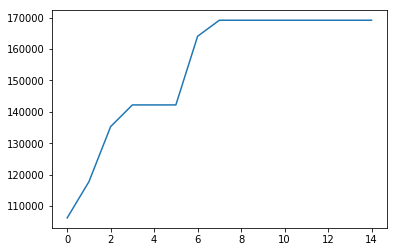

In [25]:
plt.plot([x.fitness_score() for x in bog])

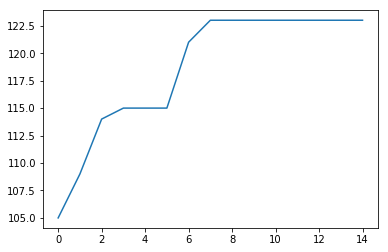

In [27]:
plt.plot([x.total_value() for x in bog])

In [2]:
from src.SalesmanRoute import Route,RequiredStop
from src.SalesmanRouteIndividual import RouteIndividual

In [3]:
def make_fake_distances(n_sites):
    distances = {}
    for n1 in range(n_sites):
        for n2 in range(n_sites):
            if n1 == n2:
                distances[n1,n2] = 0
            elif (n2,n1) in distances.keys():
                distances[n1,n2] = distances[n2,n1]
            else:
                distances[n1,n2] = np.random.random() * 100
    return distances


In [4]:
distance_matrix = make_fake_distances(100)

In [91]:
stops = [
    RequiredStop(0,4),
    RequiredStop(1,2),
    RequiredStop(2,1,200),
    RequiredStop(3,3),
    RequiredStop(4,2,450),
    RequiredStop(5,2,600),
    RequiredStop(6,2,1000),
    RequiredStop(7,2,750),
    RequiredStop(8,2),
    RequiredStop(9,2),
    RequiredStop(10,2,600),
    RequiredStop(11,2),
    RequiredStop(12,2,900),
    RequiredStop(13,2,850),
    RequiredStop(14,2,1500),
    RequiredStop(15,2),
    RequiredStop(16,2),
    RequiredStop(17,2,2000),
    RequiredStop(18,2,3000),
    RequiredStop(19,1),
    RequiredStop(20,2),
    RequiredStop(21,6,1460),
    RequiredStop(22,3,1380),
    RequiredStop(23,1),
    RequiredStop(24,9,1260),
    RequiredStop(25,4)  
]

# stops = []
# for i in range(30):
#     sto = np.random.random()
#     art = None
#     if sto < 0.2:
#         art = np.random.randint(1,2000)
#     else:
#         art = None
#     s = RequiredStop(i,np.random.randint(1,9),art)
#     stops.append(s)

In [104]:
from src.Anneal import anneal

In [113]:
population = [RouteIndividual(stops,distance_matrix) for x in range(10)]

In [114]:
population = [x for x in population if x.is_valid()]
len(population)

10

In [140]:
sol,c,ch = anneal(population[0])

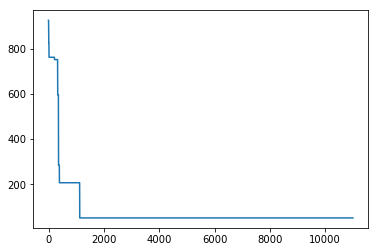

In [141]:
plt.plot(ch)

In [117]:
sol.route.stops

array([<src.SalesmanRoute.RequiredStop object at 0x0000025C90473A58>,
       <src.SalesmanRoute.RequiredStop object at 0x0000025C90473A58>], dtype=object)